### Richter law: an easy example of numpy *polyfit*

In [2]:
import pandas as pd  # import the Pandas library with the alias 'pd'
import numpy as np
import matplotlib.pyplot as plt

Seismic data (INGV) concerning a circular area around Catania (radius: 100 km), in the last 5 years.  

In [3]:
catania=pd.read_csv('data_files/catania_5.dat', sep='|')
catania.describe()

,#EventID,Latitude,Longitude,Depth/Km,Catalog,Contributor,ContributorID,Magnitude
count,7.262000e+03,7262.000000,7262.000000,7262.000000,0.0,0.0,0.0,7262.000000
mean,2.282544e+07,37.806956,15.020027,15.529221,NaN,NaN,NaN,1.731038
std,3.771171e+06,0.261716,0.314322,18.918580,NaN,NaN,NaN,0.518574
min,1.259293e+07,36.612700,14.011700,-0.300000,NaN,NaN,NaN,0.200000
25%,2.079282e+07,37.714225,14.909400,7.000000,NaN,NaN,NaN,1.400000
50%,2.320111e+07,37.755000,15.020000,9.900000,NaN,NaN,NaN,1.700000
75%,2.581441e+07,37.988600,15.126700,20.900000,NaN,NaN,NaN,2.000000
max,2.948684e+07,38.397000,16.213200,202.600000,NaN,NaN,NaN,4.900000


In [4]:
catania.head()

,#EventID,Time,Latitude,Longitude,Depth/Km,Author,Catalog,Contributor,ContributorID,MagType,Magnitude,MagAuthor,EventLocationName,EventType
0,12592931,2017-01-12T23:33:32.130000,38.1677,15.7337,12.2,BULLETIN-INGV,NaN,NaN,NaN,ML,1.3,--,1 km SW Laganadi (RC),earthquake
1,12611381,2017-01-13T16:00:57.190000,37.8542,15.5727,31.6,BULLETIN-INGV,NaN,NaN,NaN,ML,1.9,--,"Stretto di Messina (Reggio di Calabria, Messina)",earthquake
2,12649751,2017-01-15T06:35:42.660000,38.1608,15.7332,12.4,BULLETIN-INGV,NaN,NaN,NaN,ML,1.5,--,2 km SW Laganadi (RC),earthquake
3,12653941,2017-01-15T11:43:46.030000,38.1673,15.7302,12.4,BULLETIN-INGV,NaN,NaN,NaN,ML,1.1,--,1 km SW Laganadi (RC),earthquake
4,12675381,2017-01-16T15:34:14.520000,38.2543,15.0813,8.9,BULLETIN-INGV,NaN,NaN,NaN,ML,1.8,--,Costa Siciliana nord-orientale (Messina),earthquake


Select magnitude and depth of each event and make histograms 

<AxesSubplot:>

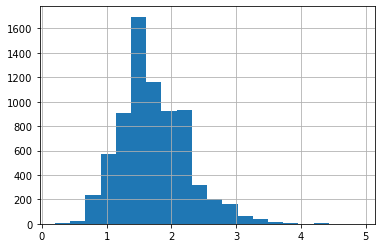

In [5]:
catania_mag=catania['Magnitude']
catania_depth=catania['Depth/Km']

catania_mag.hist(bins=20)

<AxesSubplot:>

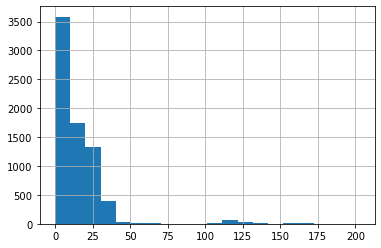

In [6]:
catania_depth.hist(bins=20)

Count the number of event for each value of the magnitude found in the DataSerie:

In [7]:
ds=catania['Magnitude'].value_counts()

In [8]:
print(type(ds))

<class 'pandas.core.series.Series'>


In [9]:
ds.head()

1.4    585
1.7    584
1.8    578
1.6    578
1.5    533
Name: Magnitude, dtype: int64

Transform the DataSerie in two numpy arrays:

In [10]:
mag_count=ds.to_numpy()
mag=ds.index.to_numpy()

Select events having magnitudes in the ```[2, 3.5]``` range:

In [11]:
min_mag=2.
max_mag=3.5

cases=np.where((mag >= min_mag) & (mag <=max_mag))

In [12]:
cases

(array([ 8,  9, 11, 12, 14, 15, 17, 18, 20, 21, 22, 24, 25, 26, 27, 29],
       dtype=int64),)

The numpy *where* function finds the indexes of elements, of a given array, that satisfy some condition. Such indexes are stored in the variable *cases* which, in the following is used to create the arrays of magnitudes (*mag_lim*) and of the corresponding number of events (*mag_count*). The variable *log_count* is the array containing the logarithms (base 10) of the number of events:  

In [13]:
mag_lim=mag[cases]
mag_count_lim=mag_count[cases]
log_count=np.log10(mag_count_lim)

In [14]:
print(mag_lim)
print(mag_count_lim)

[2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5]
[404 358 303 270 169 149 116  88  64  54  42  35  27  20  17   9]


Make a quick plot of magnitude versus log of the number of events

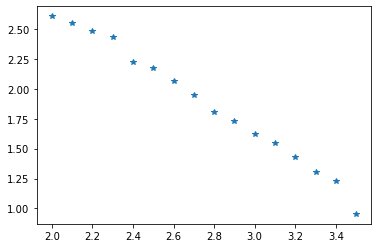

In [15]:
plt.plot(mag_lim, log_count, "*")

Now, we make a ***linear regression*** of the two plotted variables above, by using the numpy function *polyfit*. results from *polyfit* (coefficients of regression) are stored in the array *fit*: 

In [16]:
fit, cov=np.polyfit(mag_lim, log_count, 1, cov=True)

print(type(fit), fit)

<class 'numpy.ndarray'> [-1.0682673   4.81936385]


In [17]:
print(cov)

[[ 0.00071379 -0.00196293]
 [-0.00196293  0.00554974]]


Now, we want to check the fit, by plotting the actual data along with the regression line. In principle, since we have to plot a line, two points only would be required; however, to show the general case, 

- we generate an array of values of the independent values (the magnitude, *mag_plot*) by using the numpy function *linspace* 
- we use the numpy function *polyval* to compute the corrisponding log of the number of events (from the *fit* polyfit array) 

In [18]:
npoint=10
mag_plot=np.linspace(min_mag, max_mag, npoint)
mag_count_plot=np.polyval(fit, mag_plot)

Lastly, we generate the plot: 

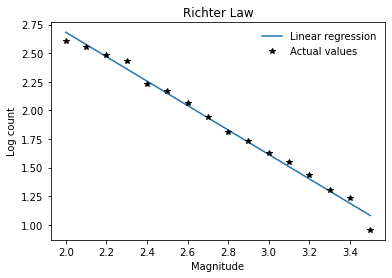

In [19]:
plt.figure()
plt.plot(mag_plot, mag_count_plot, label="Linear regression")
plt.plot(mag_lim, log_count, "k*", label="Actual values")
plt.xlabel('Magnitude')
plt.ylabel('Log count')
plt.title('Richter Law')
plt.legend(frameon=False)
plt.show()

We could define a function that does all of those operation above... 

In [17]:
def richter(datafile, mag_min, mag_max, path='./data_files/', npoint=2):
    file=path+datafile
    data=pd.read_csv(file, sep='|')
    print(data.describe())
    mag=data["Magnitude"]
    mag.hist(bins=20)
    
    ds=data['Magnitude'].value_counts()
    mag_count=ds.to_numpy()
    mag=ds.index.to_numpy()
    cases=np.where((mag >= mag_min) & (mag <= mag_max))
    mag_lim=mag[cases]
    mag_count_lim=mag_count[cases]
    log_count=np.log10(mag_count_lim)
    
    fit=np.polyfit(mag_lim, log_count, 1)
    mag_plot=np.linspace(mag_min, mag_max, npoint)
    mag_count_plot=np.polyval(fit, mag_plot)
    
    plt.figure()    
    plt.plot(mag_plot, mag_count_plot, label="Linear regression")
    plt.plot(mag_lim, log_count, "k*", label="Actual values")
    plt.xlabel('Magnitude')
    plt.ylabel('Log count')
    plt.title('Richter Law')
    plt.legend(frameon=False)
    plt.show()
    
    print("Parameters of the fit: slope %6.3f, intercept: %6.3f" % (fit[0], fit[1]))
     

           #EventID     Latitude    Longitude     Depth/Km  Catalog  \
count  7.262000e+03  7262.000000  7262.000000  7262.000000      0.0   
mean   2.282544e+07    37.806956    15.020027    15.529221      NaN   
std    3.771171e+06     0.261716     0.314322    18.918580      NaN   
min    1.259293e+07    36.612700    14.011700    -0.300000      NaN   
25%    2.079282e+07    37.714225    14.909400     7.000000      NaN   
50%    2.320111e+07    37.755000    15.020000     9.900000      NaN   
75%    2.581441e+07    37.988600    15.126700    20.900000      NaN   
max    2.948684e+07    38.397000    16.213200   202.600000      NaN   

       Contributor  ContributorID    Magnitude  
count          0.0            0.0  7262.000000  
mean           NaN            NaN     1.731038  
std            NaN            NaN     0.518574  
min            NaN            NaN     0.200000  
25%            NaN            NaN     1.400000  
50%            NaN            NaN     1.700000  
75%            Na

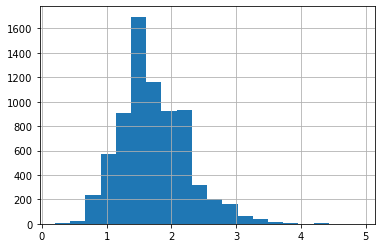

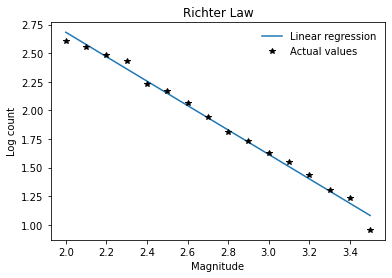

Parameters of the fit: slope -1.068, intercept:  4.819


In [18]:
richter('catania_5.dat', 2, 3.5)

A similar analysis is done for seismic data from Central Italy (circular area around l'Aquila; radius: 60 km; minimum magnitude: 2; last 5 years):

           #EventID     Latitude    Longitude     Depth/Km  Catalog  \
count  2.802000e+03  2802.000000  2802.000000  2802.000000      0.0   
mean   1.649105e+07    42.611520    13.258415    11.193469      NaN   
std    4.579583e+06     0.151819     0.113105     2.723634      NaN   
min    1.254195e+07    41.849700    12.672700     1.500000      NaN   
25%    1.275843e+07    42.520350    13.203225     9.700000      NaN   
50%    1.423485e+07    42.596400    13.267300    10.600000      NaN   
75%    1.934072e+07    42.738975    13.313300    12.100000      NaN   
max    2.944715e+07    42.890800    13.981800    50.800000      NaN   

       Contributor  ContributorID    Magnitude  
count          0.0            0.0  2802.000000  
mean           NaN            NaN     2.344968  
std            NaN            NaN     0.383679  
min            NaN            NaN     2.000000  
25%            NaN            NaN     2.100000  
50%            NaN            NaN     2.200000  
75%            Na

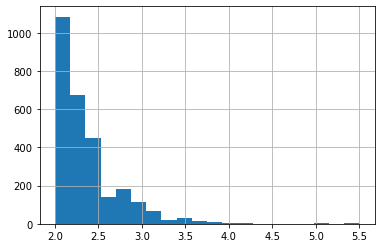

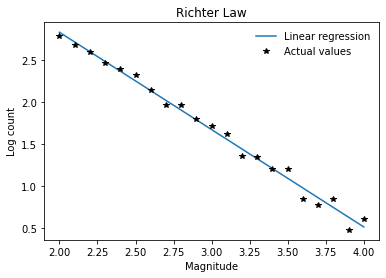

Parameters of the fit: slope -1.157, intercept:  5.142


In [19]:
richter('central_5.dat', 2, 4)

           #EventID    Latitude   Longitude    Depth/Km  Catalog  Contributor  \
count  4.770000e+02  477.000000  477.000000  477.000000      0.0          0.0   
mean   2.239706e+07   44.626879   10.518343   20.734801      NaN          NaN   
std    4.121432e+06    0.191143    0.585421   11.537163      NaN          NaN   
min    1.256547e+07   44.301700    9.623200    4.100000      NaN          NaN   
25%    1.860435e+07   44.424700   10.059800   10.700000      NaN          NaN   
50%    2.358316e+07   44.667500   10.347200   20.800000      NaN          NaN   
75%    2.495565e+07   44.755500   10.838200   26.100000      NaN          NaN   
max    2.951276e+07   45.077300   12.189300   73.200000      NaN          NaN   

       ContributorID   Magnitude  
count            0.0  477.000000  
mean             NaN    2.326415  
std              NaN    0.345095  
min              NaN    2.000000  
25%              NaN    2.100000  
50%              NaN    2.200000  
75%              NaN    2

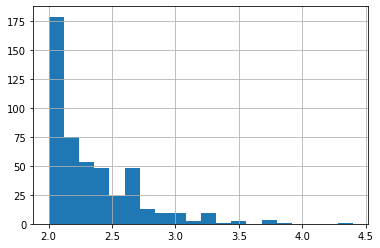

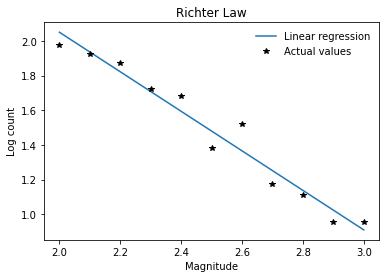

Parameters of the fit: slope -1.140, intercept:  4.330


In [20]:
richter('emilia_5.dat', 2, 3.0)